## Teaching boolean operations to simple neural networks

In [128]:
import numpy as np 
import random
import matplotlib.pyplot as plt

In [129]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [138]:
# Define a sigmoid function for illustration
def sigmoid(z):
     return 1/(1+np.exp(-z))

def relu(z):
    return z * (z > 0)

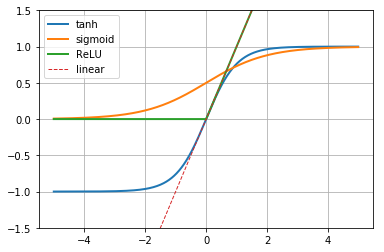

In [182]:
# Test our sigmoid function
sequence = np.arange(-5, 5, 0.01) 
plt.plot(sequence, np.tanh(sequence), linewidth=2)
plt.plot(sequence, sigmoid(sequence), linewidth=2)
plt.plot(sequence, relu(sequence), linewidth=2)
plt.plot(sequence, sequence, linewidth=1, linestyle='--')
plt.ylim([-1.5, 1.5])
plt.grid()
plt.legend(['tanh','sigmoid', 'ReLU', 'linear'])
plt.show()

#### Implement OR

In [117]:
# Define logical or (only for training!)
def logical_or(values):
    if values[0] == 1 or values[1] == 1:
        return 1
    return 0

In [118]:
# Generate some training data
X = [[random.randint(0,1), random.randint(0,1)] for x in range(1000)]
y = [logical_or(x) for x in X]

In [108]:
# Defining our trivial network with a single layer, a tanh activation function and a bias unit
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='tanh', use_bias=True))
model.compile(optimizer="SGD", loss="mean_squared_error", metrics=['accuracy'])

In [119]:
# Training our model with the generated training data
model.fit(np.array(X), np.array(y), epochs=50, verbose=0)

In [120]:
# Evaluate our model with some validation data
model.predict(np.array([[1,0],[1,1],[0,0],[0,1]]))

array([[ 0.91517413],
       [ 0.99554437],
       [ 0.03236142],
       [ 0.90976238]], dtype=float32)

In [121]:
# Visualize the weights of the model
for layer in model.layers:
    print(layer.get_weights())

[array([[ 1.52610874],
       [ 1.49377108]], dtype=float32), array([ 0.03237272], dtype=float32)]


#### Implement AND

In [157]:
# We define logical and (only for training!)
def logical_and(values):
    if values[0] == 1 and values[1] == 1:
        return 1
    return 0

In [158]:
# Generate some training data
X = [[random.randint(0,1), random.randint(0,1)] for x in range(1000)]
y = [logical_and(x) for x in X]

In [159]:
# Defining our trivial network with a single layer, a tanh activation function and a bias unit
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='tanh', use_bias=True))
model.compile(optimizer="SGD", loss="mean_squared_error", metrics=['accuracy'])

In [160]:
# Training our model with the generated training data
model.fit(np.array(X), np.array(y), epochs=50, verbose=0)

In [161]:
# Evaluate our model with some validation data
model.predict(np.array([[1,0],[1,1],[0,0],[0,1]]))

array([[ 0.25409552],
       [ 0.62798429],
       [-0.22112262],
       [ 0.2481669 ]], dtype=float32)

In [162]:
# Visualize the weights of the model
for layer in model.layers:
    print(layer.get_weights())

[array([[ 0.48462233],
       [ 0.47829461]], dtype=float32), array([-0.22483614], dtype=float32)]


#### Implement XNOR

In [163]:
# We define logical xnor (only for training!)
def logical_xnor(values):
    if values[0] == 1 and values[1] == 1:
        return 1
    if values[0] == 0 and values[1] == 0:
        return 1
    return 0

In [164]:
# Generate some training data
X = [[random.randint(0,1), random.randint(0,1)] for x in range(1000)]
y = [logical_xnor(x) for x in X]

In [168]:
# Thats what xnor is
[logical_xnor(x) for x in [[1,0],[1,1],[0,0],[0,1]]]

[0, 1, 1, 0]

In [173]:
# Defining our trivial network with a single layer, a tanh activation function and a bias unit
model = Sequential()
model.add(Dense(2, input_shape=(2,), activation='tanh', use_bias=True))
model.add(Dense(1, activation='tanh', use_bias=True))
model.compile(optimizer="SGD", loss="mean_squared_error", metrics=['accuracy'])

In [176]:
# Training our model with the generated training data
model.fit(np.array(X), np.array(y), epochs=100, verbose=0)

In [177]:
# Evaluate our model with some validation data
model.predict(np.array([[1,0],[1,1],[0,0],[0,1]]))

array([[ 0.02439944],
       [ 0.8456887 ],
       [ 0.87803185],
       [ 0.0281299 ]], dtype=float32)